[Ford go bike](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)# Ford Bike trip Data
## by Mazen Mobtasem

## Preliminary Wrangling

> This dataset includes bike trip data about rides that has been recorded by ford company.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> The dataset consists of 16 features with a total of 183412 observations


> The main features are the durations of the ride, age of the members, gender of the members and the distances that they moved.


>  The features of interest are duration_sec, member_birth_year , member_gender, start_station_latitude start_station_longitude, end_station_latitude, end_station_longitude.

## Univariate Exploration

In [5]:
df["member_gender"] = df["member_gender"].fillna("Other")

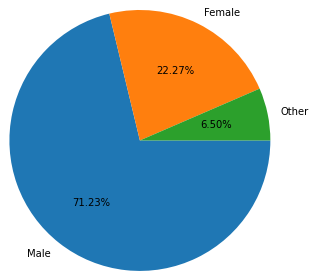

In [6]:
gender_Count = df["member_gender"].value_counts()
plt.pie(gender_Count, labels=["Male","Female","Other"], counterclock= False,radius = 1.5,autopct='%1.2f%%');

From the previous Pie chart it is noticable that the majority (74.89%) of the population are males.

In [7]:
#Filling the NAN in member_birth_year the average year of the column with no decimals
df["member_birth_year"] = df["member_birth_year"].fillna(int(df["member_birth_year"].mean()))
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.0,Other,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


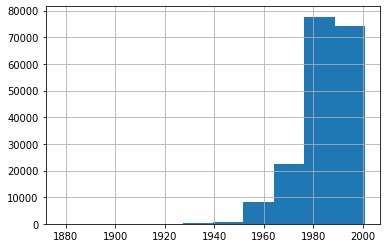

In [8]:
df["member_birth_year"].hist();

In [9]:
print("Minimum year is",df["member_birth_year"].min())
df["member_birth_year"].value_counts()
# It is noticable that there is some outliers messing up the histogram

Minimum year is 1878.0


1984.0    14827
1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

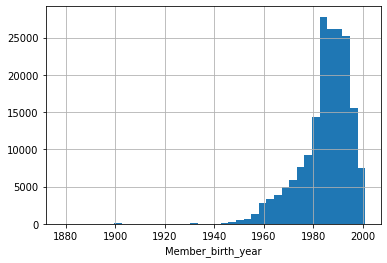

In [10]:
ax = df["member_birth_year"].hist(bins = 40);
ax.set_xlabel("Member_birth_year");

In [11]:
df = df[df.member_birth_year > 1920.0]

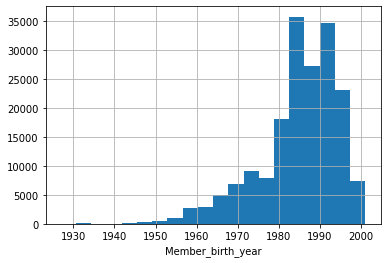

In [12]:
ax = df["member_birth_year"].hist(bins = 20);
ax.set_xlabel("Member_birth_year");

We can see from the previous historgram that most number of users are born in 1984 which increased furthermore when we add the mean to fill the NaN

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

> The distribution of the member birth year had outliers while the gender members has 2.5% of non specified others catigory. Yes.

> We need to tidy the data to be able to do bivariante and multivariante exploration and be accurate about as some outliers or missing data can mess up the visualizations.

## Bivariate Exploration

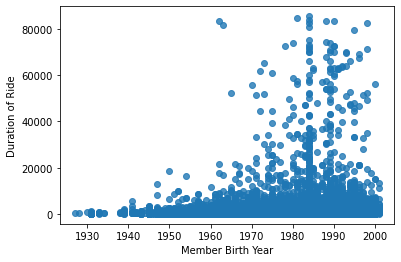

In [13]:
sb.regplot(data = df, x = 'member_birth_year', y = 'duration_sec',fit_reg=False);
plt.xlabel('Member Birth Year');
plt.ylabel('Duration of Ride');

It is noticable that the more young customers have higher ride durations than the older people. yet the corrolation is not very strong between the two variables.

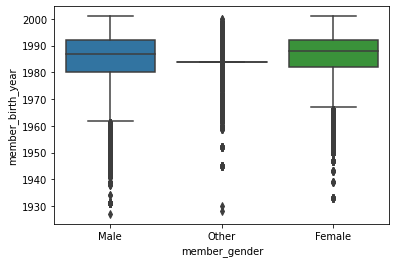

In [14]:
sb.boxplot(data = df, x = 'member_gender', y = 'member_birth_year');

While the most of the population are young people as shown in the previous boxplot as it shows that older people are outliers here. We are not able to exclude old people as they still represent a huge number of customers

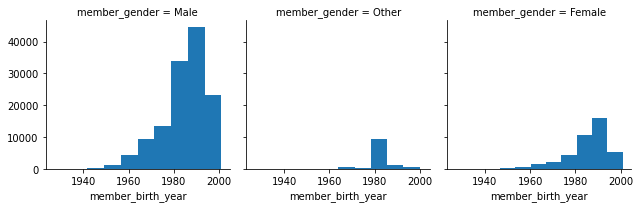

In [15]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, "member_birth_year");

The number of young customers represent the most of customers in each gender

> The first visualizations showed moderate corrolation while the second emphasised that we need to get rid of some of the data but it will make us get rid of a huge segment of the customers. The third visualization showed that the gender affects the count but the rythem in all genders are the same.


## Multivariate Exploration

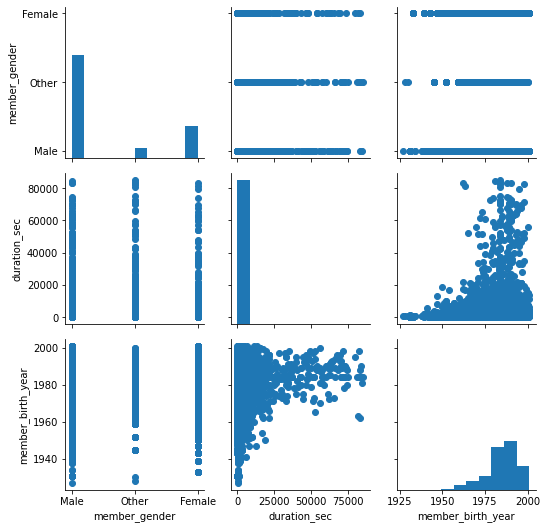

In [16]:
g1 = sb.PairGrid(data = df, vars = ['member_gender', 'duration_sec', 'member_birth_year']);
g1.map_diag(plt.hist);
g1.map_offdiag(plt.scatter);

> The relationship between duration and birth year with the gender was moderate but showed good facts.


> Logically the output came as expected as older people do less time and males gave the highest duration.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!